<h1 style="text-align: center; color:#33b864">Data Analysis Using Python and Pandas<br/>
</h1>

<b style="color:#046ebf">By: Lachlan Tucker<br/>

</b>Road data provided by QLD TMR

## A: What is the statistical correlation between Volume, Occupancy and Speed?

In [1]:
import pandas as pd

def harmonic_mean_speed(group) :
    hms_dataframe = group
    hms_dataframe['vol_over_speed'] = hms_dataframe['Volume']/hms_dataframe['Speed']
    hms_dataframe = hms_dataframe.dropna(subset=['Speed']) 

    try:
        hms = sum(hms_dataframe['Volume'])/sum(hms_dataframe['vol_over_speed'])
    except:
        hms = float('NaN')
        
    return hms
    
def combine_lanes(group) :
    return pd.Series([group.Volume.mean(), group.Occupancy.mean(), harmonic_mean_speed(group)], index=['Volume', 'Occupancy', 'Speed'])

laned_data = pd.read_csv('5270Sapp.csv', parse_dates=['Time_AEST'])

combined_lanes = laned_data.groupby('Time_AEST').apply(combine_lanes)

In [2]:
combined_lanes.corr()

,Volume,Occupancy,Speed
Volume,1.000000,0.745439,-0.405309
Occupancy,0.745439,1.000000,-0.860883
Speed,-0.405309,-0.860883,1.000000


Volume/Occupancy pearson correlation = 72.6988%
Volume/Speed pearson correlation = -38.7292%
Speed/Occupancy pearson correlation = -85.8068%.

The Volume/Occupancy correlation is strongly positive (approx. 72%) as expected as higher occupancy rates were often observed during high volumes (larger amount of cars means both measures increase).
The Volume/Speed correlation is approx. -38%, moderately negative. This makes sense as higher volumes were observed to cause traffic, causing lower speeds.
The Speed/Occpuancy correlation is strongly negative (approx. -86%), this also makes sense as when speeds are high the cars do not spend as long ontop of the sensors leading to lower occupancy levels. 

## B: Compute *"normal"* values for each hour of each day of the week

In [3]:

#print(combined_lanes.index.day)

test = combined_lanes.copy()

#test = test.set_index(['Time_AEST'])

test['Hour'] = test.index.hour

test['Day'] = test.index.day_of_week

test = test.groupby(['Day','Hour']).apply(combine_lanes)

test



Volume  Occupancy      Speed
Day Hour                                
0   0     1.382407   0.590278  96.986007
    1     0.931944   0.413287  97.167401
    2     0.912963   0.431667  97.689768
    3     1.260648   0.611250  98.446251
    4     3.001389   1.634861  99.095697
...            ...        ...        ...
6   19    7.920370   3.403241  97.274611
    20    6.728704   2.727176  96.957335
    21    5.268056   2.142361  97.010168
    22    4.159722   1.691898  97.186543
    23    2.421296   0.995000  97.167107

[168 rows x 3 columns]

In [4]:
normal = combined_lanes.copy()

#add column hour
normal['Hour'] = normal.index.hour

#add column day_of_week
normal['Day'] = normal.index.day_of_week

normal = normal.groupby(['Day','Hour']).apply(combine_lanes)

normal


Volume  Occupancy      Speed
Day Hour                                
0   0     1.382407   0.590278  96.986007
    1     0.931944   0.413287  97.167401
    2     0.912963   0.431667  97.689768
    3     1.260648   0.611250  98.446251
    4     3.001389   1.634861  99.095697
...            ...        ...        ...
6   19    7.920370   3.403241  97.274611
    20    6.728704   2.727176  96.957335
    21    5.268056   2.142361  97.010168
    22    4.159722   1.691898  97.186543
    23    2.421296   0.995000  97.167107

[168 rows x 3 columns]

## C: Display the normal values of each variable in a tabular format (by hour of day and day of week)

In [5]:
def normal_by_day_hour(column) :
    df = normal[column].round(1)

    df = df.reset_index()
    #replace days of week
    df["Day"].replace(daydict, inplace=True)

    df = df.set_index(["Day","Hour"])

    df = df.unstack("Day")

    df = df.droplevel(0,axis = 1)

    return df.loc[:, ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]    
    
#create index/dict    
daynum = [0,1,2,3,4,5,6]
dayname = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

daydict = dict(zip(daynum, dayname))

In [6]:
normal_by_day_hour('Volume')

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,1.4,1.5,1.6,1.8,2.0,2.7,2.7
1,0.9,1.0,1.1,1.2,1.3,1.6,1.7
2,0.9,1.1,1.1,1.2,1.2,1.3,1.2
3,1.3,1.4,1.4,1.4,1.6,1.3,1.2
4,3.0,3.2,3.1,3.3,3.4,2.1,1.6
5,10.0,10.8,10.6,10.7,10.5,4.8,2.8
6,16.2,17.4,16.7,17.6,16.7,7.5,4.9
7,18.7,20.2,19.5,20.5,20.1,11.1,7.4
8,17.6,18.7,18.1,19.3,19.1,15.7,11.8


In [7]:
normal_by_day_hour('Occupancy')

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,0.6,0.7,0.7,0.8,0.9,1.1,1.2
1,0.4,0.5,0.6,0.6,0.6,0.7,0.7
2,0.4,0.5,0.5,0.6,0.6,0.6,0.7
3,0.6,0.7,0.7,0.7,0.8,0.6,0.5
4,1.6,1.5,1.4,1.5,1.6,0.9,0.7
5,4.5,4.9,4.7,4.8,4.7,2.1,1.4
6,7.3,7.8,7.6,7.9,7.5,3.2,2.0
7,8.4,9.3,8.9,9.4,9.1,4.6,3.0
8,8.2,8.5,8.4,8.8,8.7,6.5,4.8


In [8]:
normal_by_day_hour('Speed')

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,97.0,97.9,97.9,98.2,98.4,97.6,97.2
1,97.2,96.5,97.8,98.0,98.4,97.5,97.1
2,97.7,95.6,98.5,98.3,98.6,97.8,97.1
3,98.4,96.9,98.9,99.1,98.8,97.9,97.6
4,99.1,98.8,99.1,99.2,99.1,98.5,97.5
5,98.8,98.6,98.9,98.8,99.0,98.5,97.7
6,96.7,96.6,96.7,96.7,97.0,98.4,98.4
7,95.1,94.8,94.3,95.0,95.2,98.0,98.4
8,95.1,95.1,94.4,95.1,95.1,97.2,98.0


## D: Join the data for each hour of the sample period with the corresponding normal data for that hour of day and day of week

In [9]:

hourly = combined_lanes.copy()
#add column hour
hourly['Hour'] = hourly.index.hour

#add column day_of_week
hourly['Day'] = hourly.index.day_of_week

hourly = hourly.reset_index()

hourly['DateHour'] = hourly['Time_AEST'].dt.strftime('%Y/%m/%d %H')

hourly['DateHour'] = pd.to_datetime(hourly.DateHour)

hourly = hourly.groupby(['DateHour','Hour','Day']).apply(combine_lanes)

joined = hourly.join(normal, rsuffix='_Normal').sort_values('DateHour')

joined = joined.reset_index()

joined['Date'] = joined.DateHour.dt.strftime('%Y-%m-%d')

for metric in ['Speed','Volume','Occupancy']:
    joined[metric+'_Difference'] = (joined[metric]/joined[metric+'_Normal'] - 1)*100

diff = joined.loc[:, ['Date','Day','Hour','Volume','Occupancy','Speed','Volume_Normal','Occupancy_Normal','Speed_Normal','Speed_Difference','Volume_Difference','Occupancy_Difference']]

diff

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
0,2021-05-01,5,0,2.620833,1.112500,95.908087,2.658796,1.096759,97.641756,-1.775541,-1.427825,1.435205
1,2021-05-01,5,1,1.729167,0.782500,95.849091,1.602778,0.671991,97.529852,-1.723329,7.885615,16.445057
2,2021-05-01,5,2,1.208333,0.532083,95.681310,1.274537,0.560463,97.821440,-2.187792,-5.194333,-5.063605
3,2021-05-01,5,3,1.304167,0.589583,95.484044,1.319444,0.585000,97.931591,-2.499242,-1.157895,0.783476
4,2021-05-01,5,4,2.000000,0.923333,96.384245,2.129630,0.938056,98.487856,-2.135909,-6.086957,-1.569440
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2021-06-30,2,19,4.454167,2.024583,98.588871,9.436574,4.043611,97.218504,1.409574,-52.798901,-49.931305
1460,2021-06-30,2,20,2.970833,1.337500,97.980642,7.113426,3.036991,97.334488,0.663850,-58.236251,-55.959695
1461,2021-06-30,2,21,2.383333,1.074583,97.369316,5.702315,2.401852,97.357007,0.012643,-58.204108,-55.260216
1462,2021-06-30,2,22,2.162500,0.959583,97.896579,4.349537,1.854074,97.544766,0.360668,-50.282065,-48.244606


## E: For each variable, identify which hours of the sample period had the largest variation compared to normal values

In [10]:
def find_worse(column, ascending, count) :
    return diff.sort_values(column+'_Difference', ascending=ascending).head(count)

In [11]:
worst_speed = find_worse('Speed', True, 5) # find the 5 rows with the worst speed differences
worst_speed

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
516,2021-05-22,5,12,14.891667,37.021250,18.676790,20.606019,15.443009,56.880174,-67.164676,-27.731470,139.728212
255,2021-05-11,1,15,15.679167,38.884167,20.428037,21.697222,20.267269,48.568903,-57.940089,-27.736525,91.856967
618,2021-05-26,2,18,15.316667,22.497917,32.418639,15.392593,8.912130,73.950916,-56.161951,-0.493263,152.441533
1165,2021-06-18,4,13,18.500000,24.635000,35.694000,22.348958,13.168698,75.569461,-52.766635,-17.222093,87.072406
1164,2021-06-18,4,12,19.545833,22.274167,41.263005,21.676778,11.755126,81.916548,-49.627998,-9.830543,89.484720


In [12]:
worst_volume = find_worse('Volume', True, 4) # find the 4 rows with the worst volume difference
worst_volume

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
53,2021-05-03,0,5,2.858333,1.252500,96.830057,10.000926,4.471296,98.760553,-1.954724,-71.419313,-71.987989
54,2021-05-03,0,6,4.666667,2.009583,97.629670,16.184722,7.320833,96.677362,0.985037,-71.166223,-72.549801
55,2021-05-03,0,7,6.195833,2.624583,97.507163,18.703704,8.359815,95.092860,2.538889,-66.873762,-68.604767
1460,2021-06-30,2,20,2.970833,1.337500,97.980642,7.113426,3.036991,97.334488,0.663850,-58.236251,-55.959695


In [13]:
worst_occupancy = find_worse('Occupancy', False, 3) # find the 3 rows with the worst occupancy difference
worst_occupancy

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
1370,2021-06-27,6,2,1.225000,2.582917,97.115221,1.212037,0.736713,97.093388,0.022487,1.069519,250.600138
618,2021-05-26,2,18,15.316667,22.497917,32.418639,15.392593,8.912130,73.950916,-56.161951,-0.493263,152.441533
516,2021-05-22,5,12,14.891667,37.021250,18.676790,20.606019,15.443009,56.880174,-67.164676,-27.731470,139.728212


## F: Preparing data to visualize the hours that appear most atypical

In [14]:
def get_normal_by_minute(hour_of_day, day_of_week, date) :
    norm_min = combined_lanes.copy()

    #add column hour
    norm_min['Hour'] = norm_min.index.hour

    #add column day_of_week
    norm_min['Day'] = norm_min.index.day_of_week

    #add column for minute
    norm_min['Minute'] = norm_min.index.minute

    norm_min = norm_min.reset_index()

    norm_min['Date'] = norm_min['Time_AEST'].dt.strftime('%Y-%m-%d')

    norm_min = norm_min.loc[norm_min['Date'] != date]

    norm_min = norm_min.groupby(['Day','Hour','Minute']).apply(combine_lanes)

    norm_min = norm_min.reset_index()

    norm_min = norm_min.loc[(norm_min['Hour'] == hour_of_day) & (norm_min['Day'] == day_of_week)]

    norm_min = norm_min.set_index('Minute')

    return norm_min.drop(['Day','Hour'],axis=1)

def get_atypical_by_minute(hour_of_day, day_of_week, date) :
    atyp = combined_lanes.copy()

    #add column hour
    atyp['Hour'] = atyp.index.hour

    #add column day_of_week
    atyp['Day'] = atyp.index.day_of_week

    #add column for minute
    atyp['Minute'] = atyp.index.minute

    atyp = atyp.reset_index()

    atyp['Date'] = atyp['Time_AEST'].dt.strftime('%Y-%m-%d')

    atyp = atyp.loc[(atyp['Date'] == date) & (atyp['Hour'] == hour_of_day) & (atyp['Day'] == day_of_week)]

    atyp = atyp.set_index('Minute')

    return atyp.drop(['Time_AEST','Day','Hour','Date'],axis=1)


In [15]:
get_normal_by_minute(17, 6, '2021-06-20')

,Volume,Occupancy,Speed
Minute,,,
0,13.906250,5.775000,96.315998
1,13.281250,5.334375,97.718211
2,15.218750,6.256250,95.358363
3,13.906250,5.696875,96.379254
4,15.062500,6.240625,94.989736
5,14.000000,5.768750,96.555807
6,15.000000,6.153125,96.157902
7,14.000000,5.781250,96.115916
8,15.031250,6.090625,96.286917


In [16]:
get_atypical_by_minute(17, 6, '2021-06-20')

,Volume,Occupancy,Speed
Minute,,,
0,15.50,6.600,94.141045
1,17.75,7.025,95.521992
2,20.50,8.525,95.828146
3,15.00,6.050,97.685349
4,17.00,6.900,94.149706
5,17.25,7.050,94.724514
6,17.50,7.550,93.724095
7,18.25,7.825,95.043704
8,14.25,6.025,95.939452


## G: Visualize the hours that appear most atypical

In [17]:
import matplotlib.pyplot

def plot_hour_comparision(hour_of_day, day_of_week, date) :
    variables = ['Speed', 'Occupancy', 'Volume']  
    fig, axes = matplotlib.pyplot.subplots(ncols=len(variables), figsize=(20,8))
    
    norm = get_normal_by_minute(hour_of_day, day_of_week, date)
    atyp = get_atypical_by_minute(hour_of_day, day_of_week, date)

    i = 0
    for var in variables:
        norm[var].plot(ax=axes[i], title = var, legend = True, xticks=range(0,61,5), ylabel=var) 
        atyp[var].plot(ax=axes[i], title = var, legend = True, xticks=range(0,61,5), ylabel=var)
        axes[i].legend(['normal','incident'])
        i += 1


    fig.suptitle(daydict[day_of_week] + ' ' + date + ' at hour ' + str(hour_of_day) )   
    matplotlib.pyplot.show()
    
    

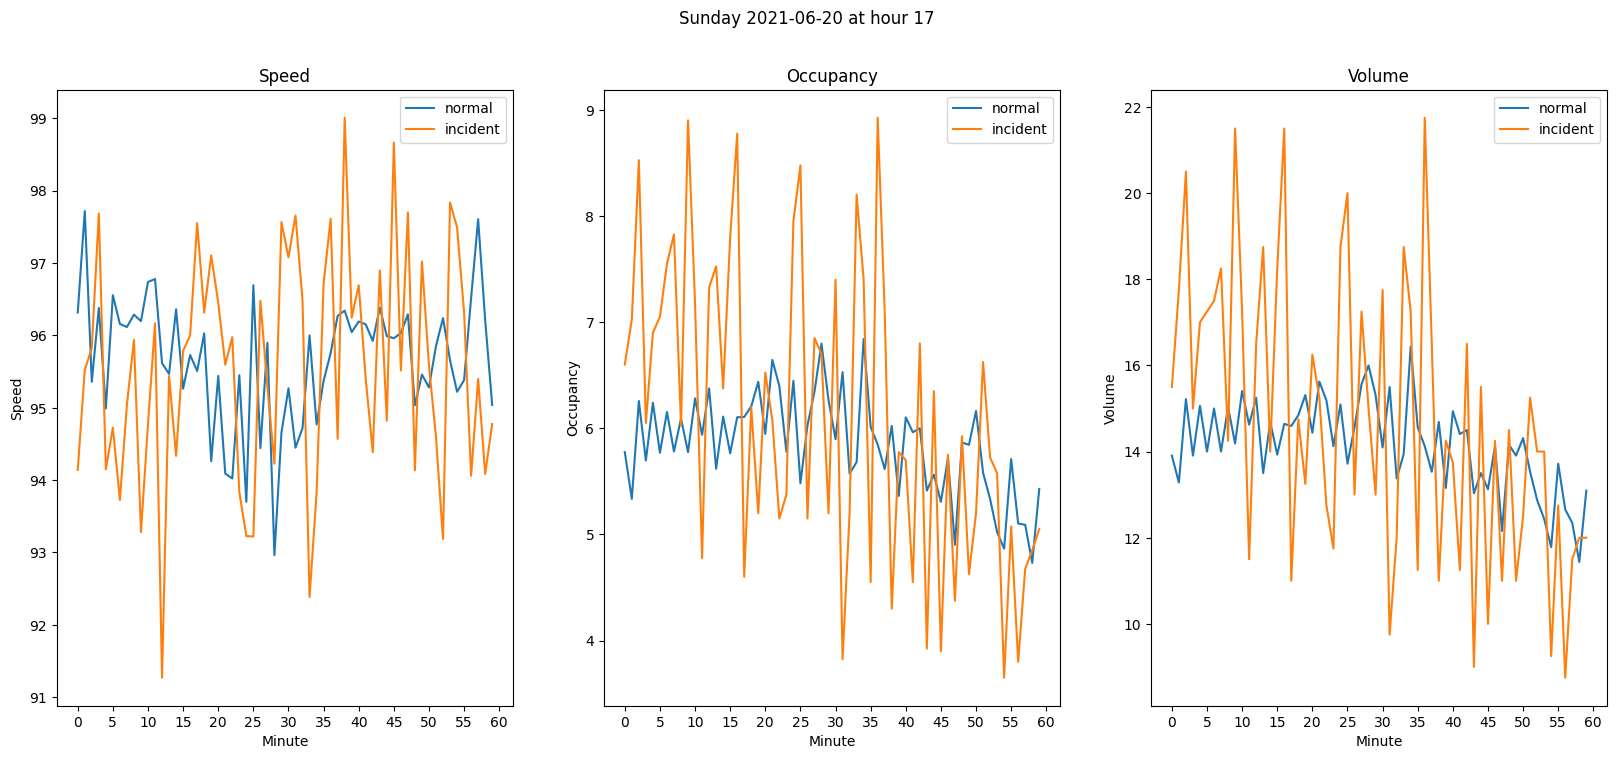

In [18]:
# Test example
plot_hour_comparision(17, 6, '2021-06-20') 


## H: Now that we can visualize a specific hour, we can do so for each of the rows in our outlier lists

In [19]:
def visualize_worst(worst) :
    for index, row in worst[['Hour','Day','Date']].iterrows():
        plot_hour_comparision(row['Hour'], row['Day'], row['Date']) 

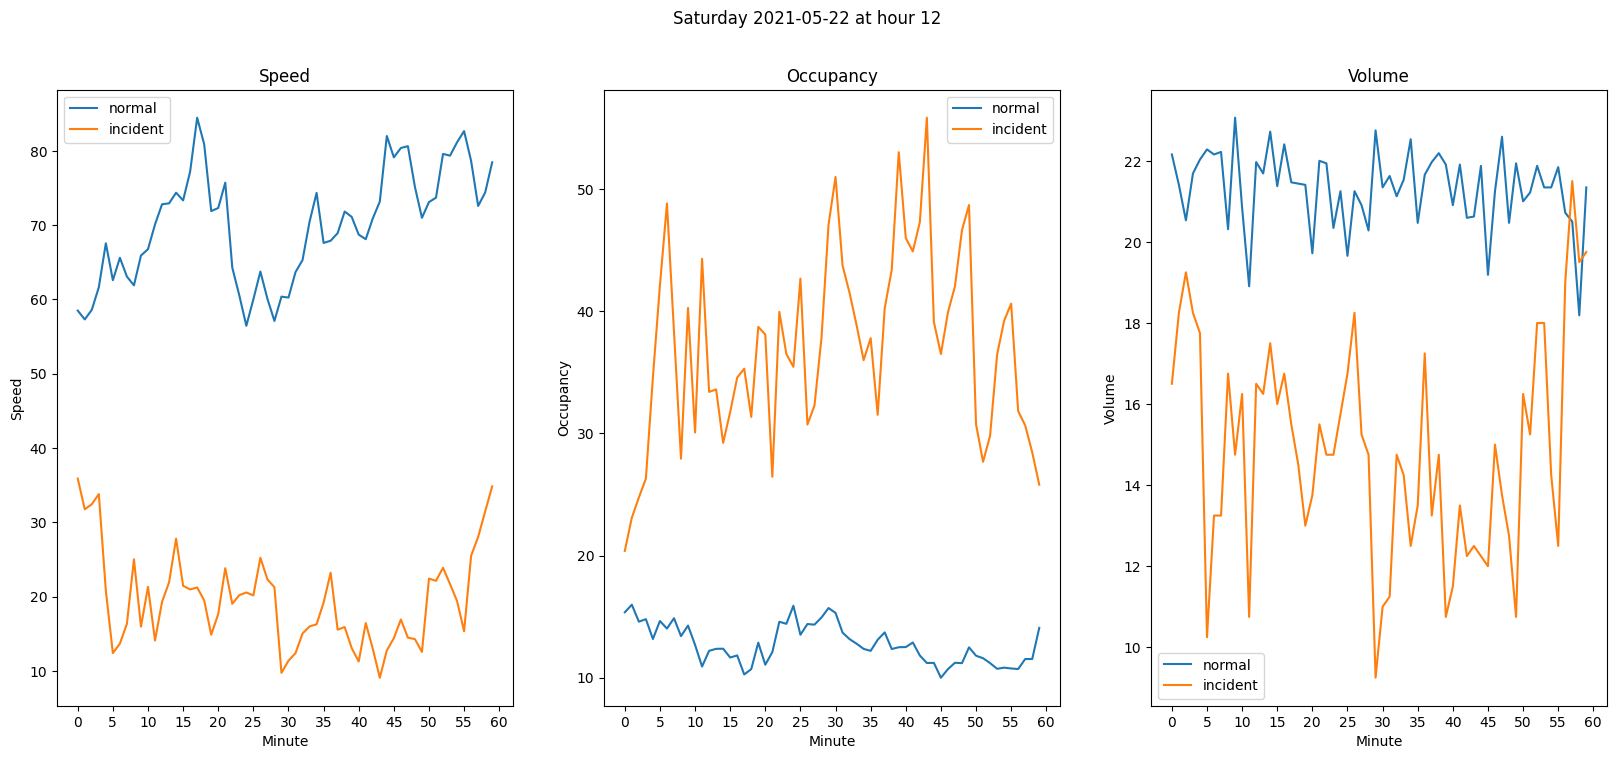

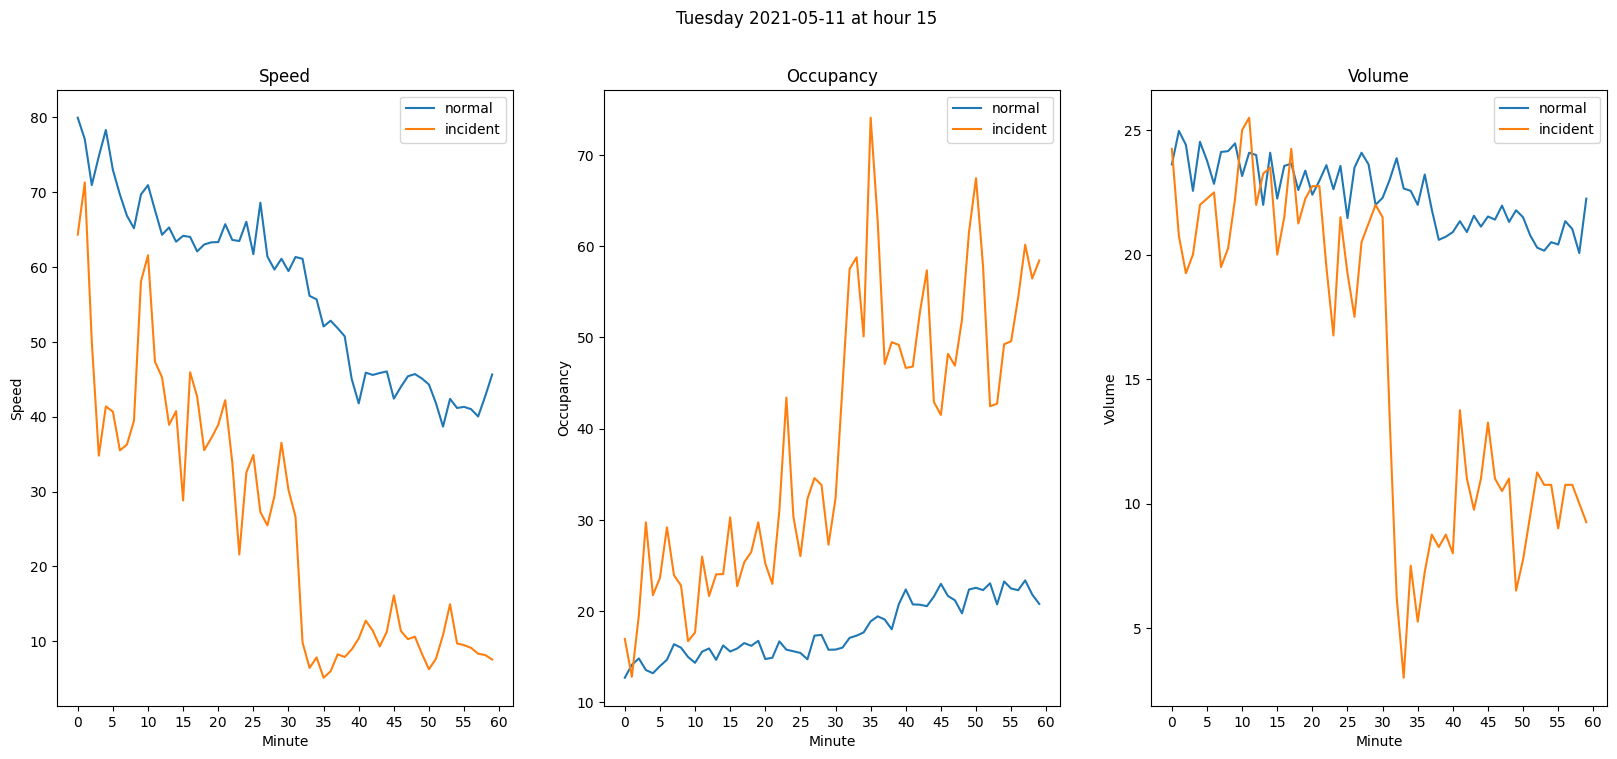

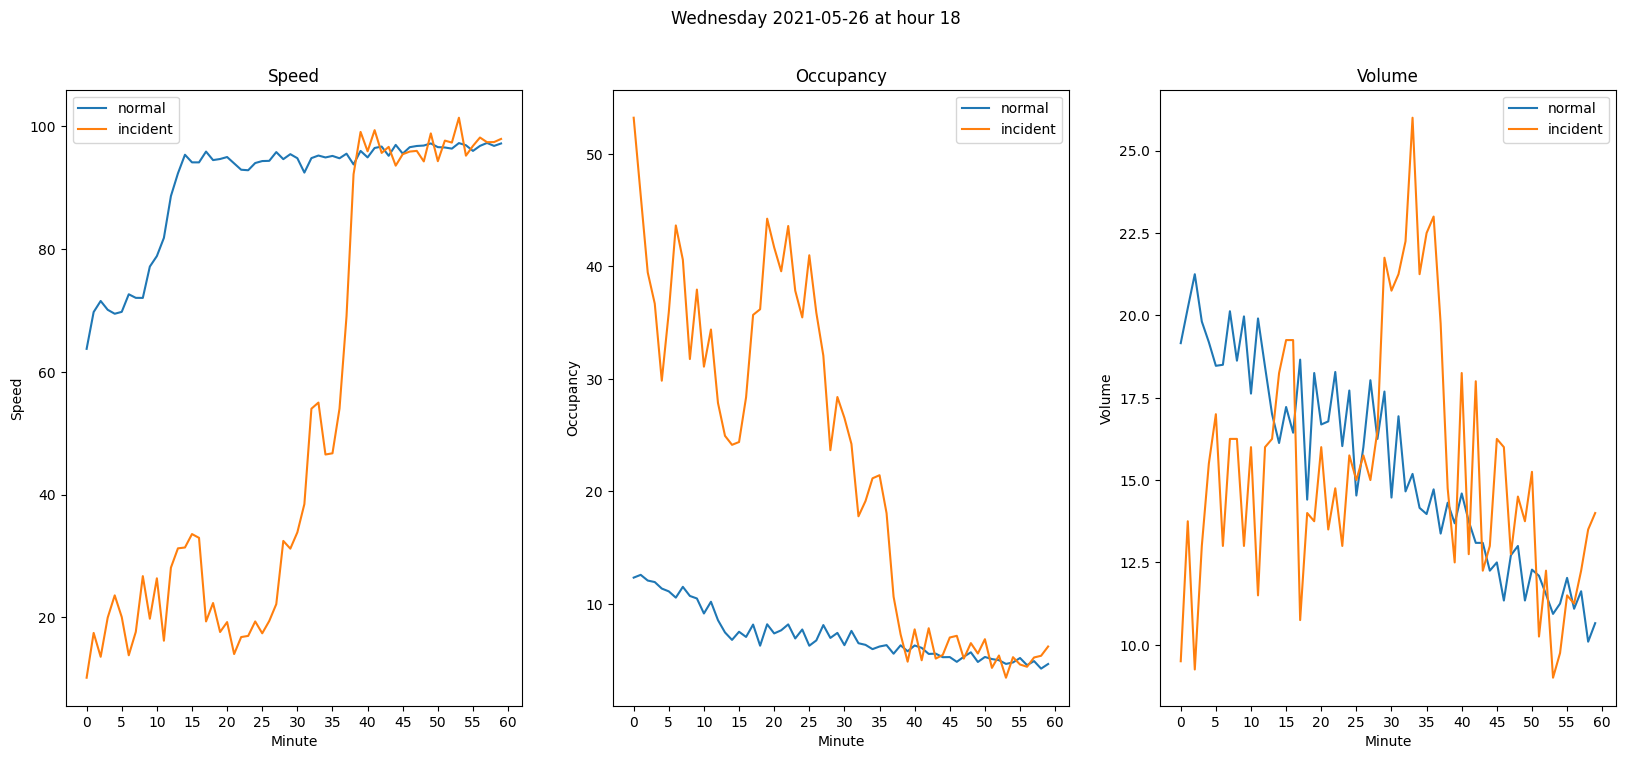

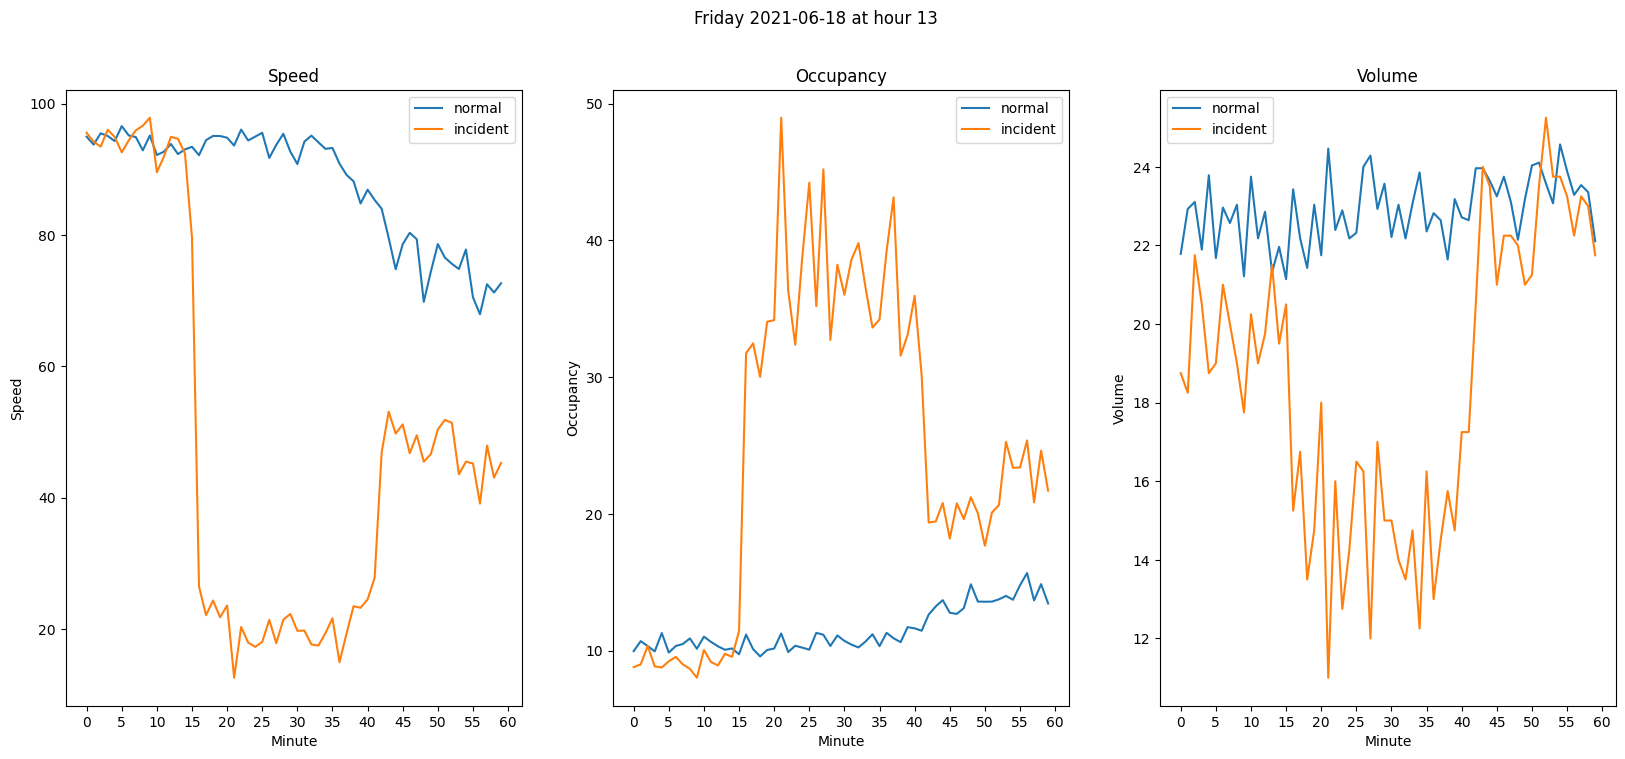

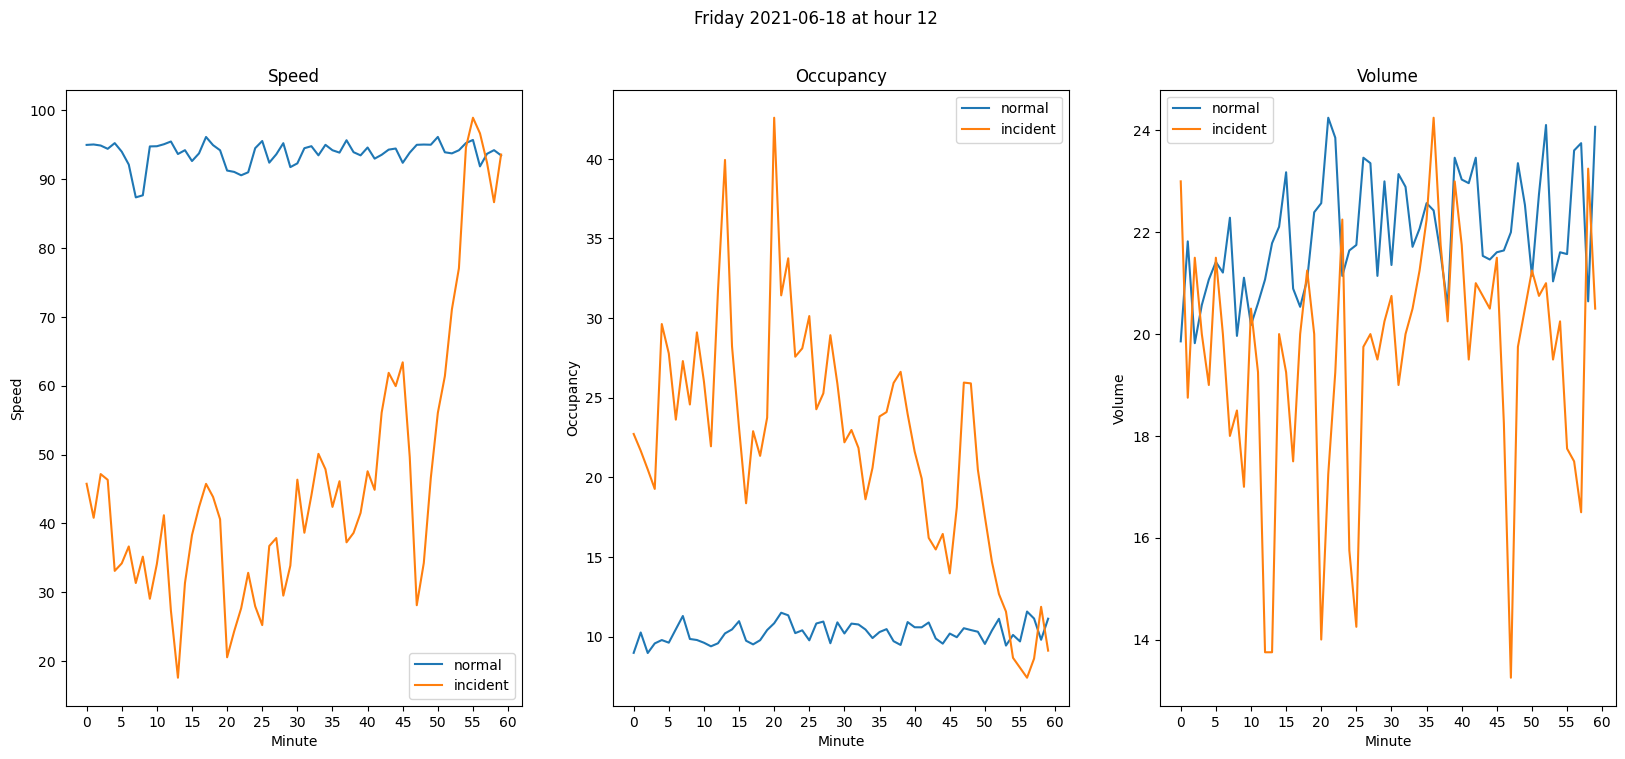

In [20]:
visualize_worst(worst_speed)

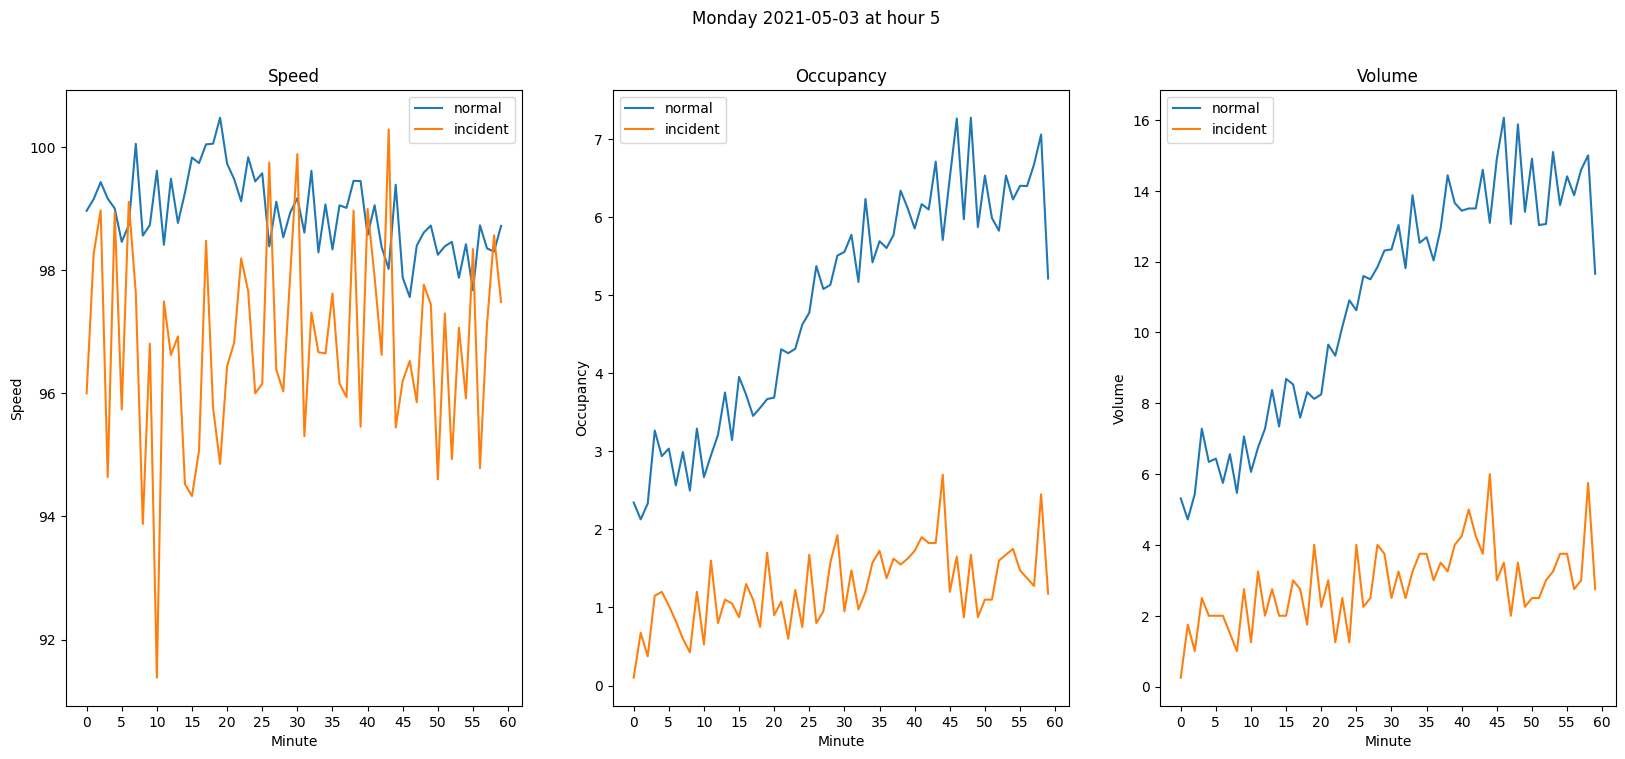

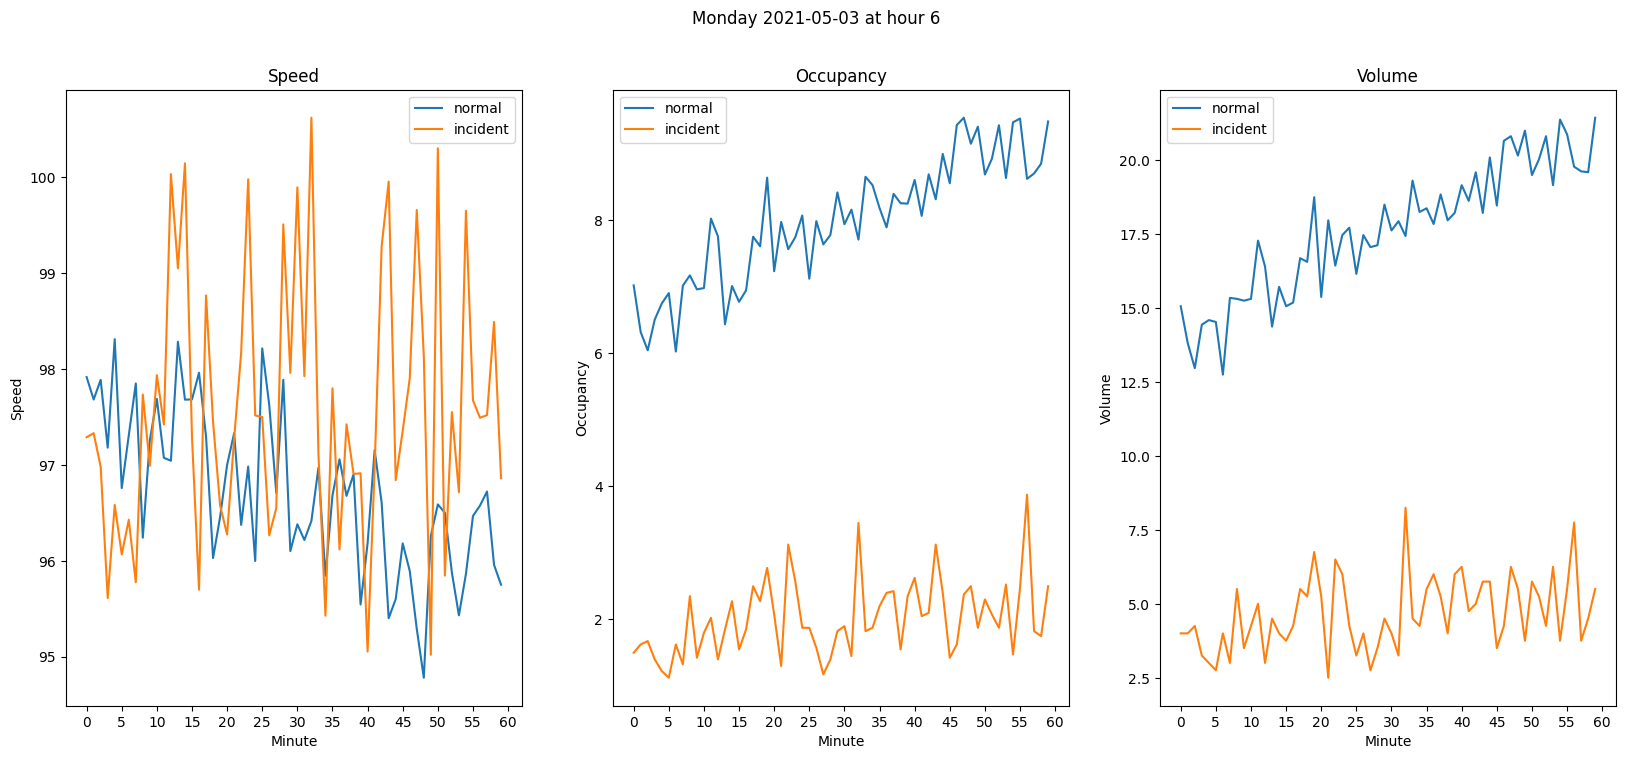

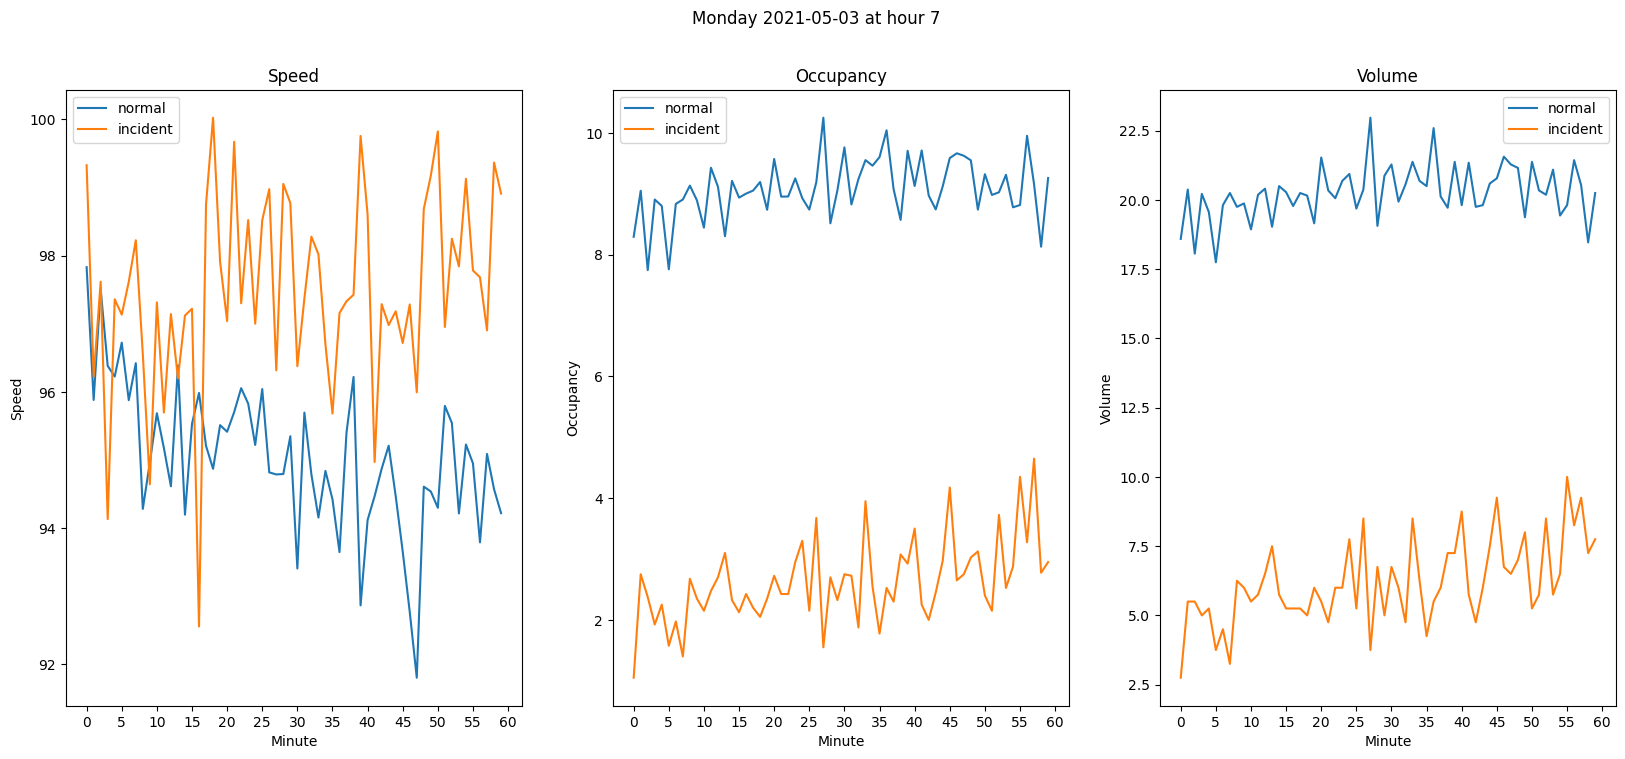

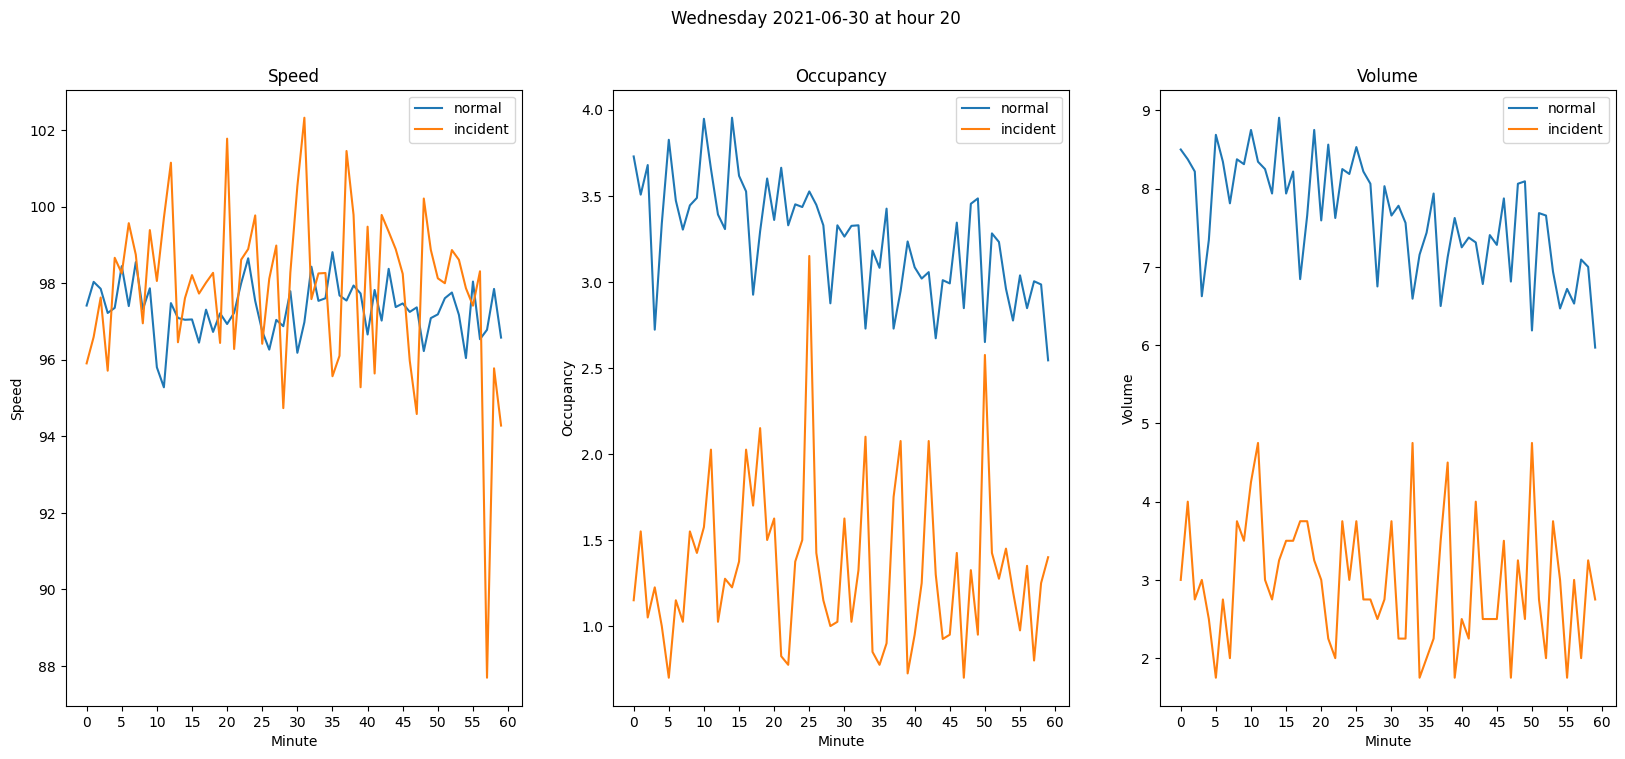

In [21]:
visualize_worst(worst_volume)

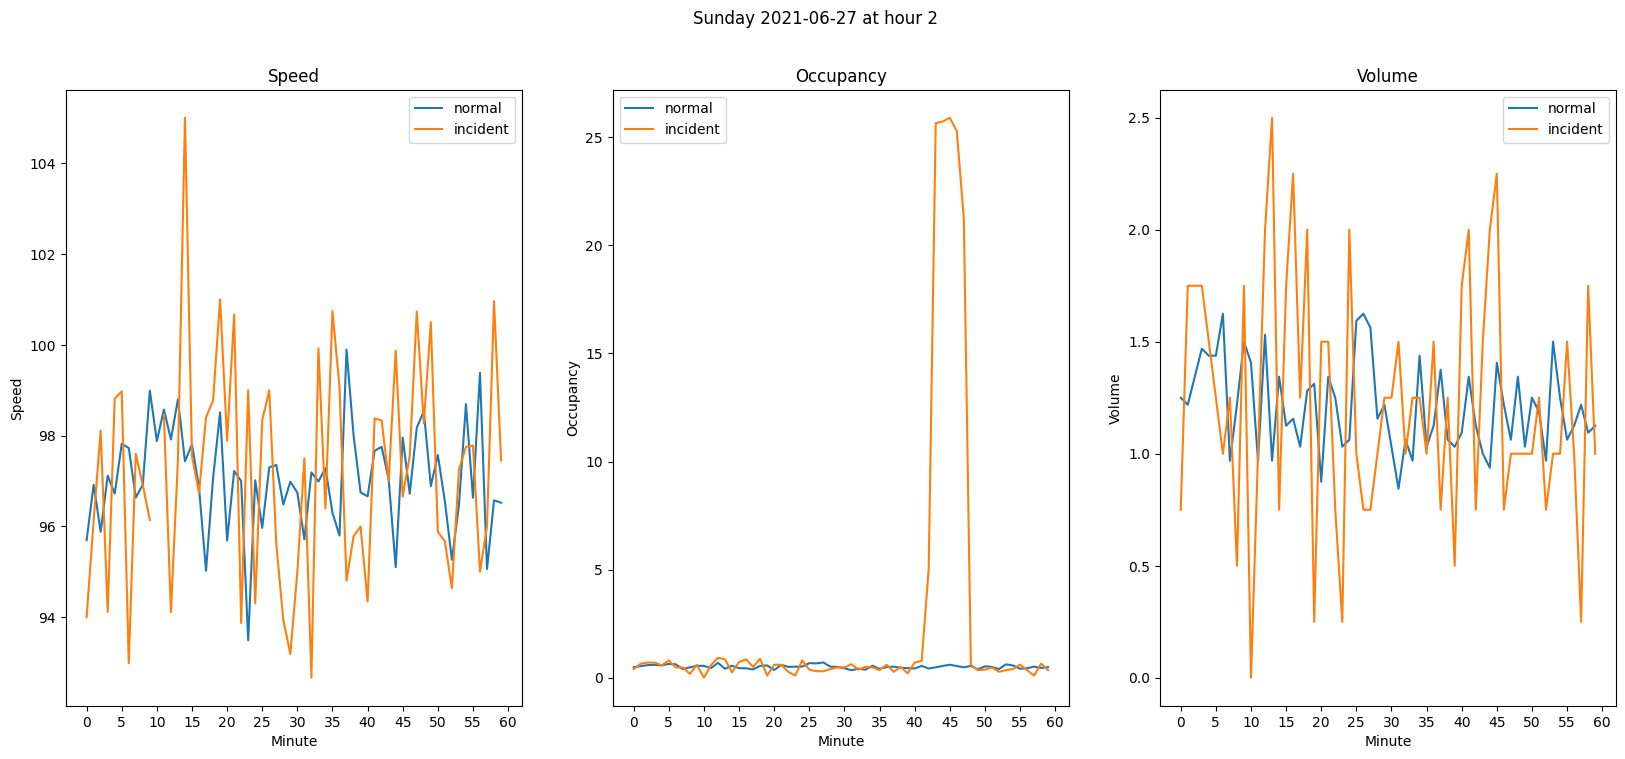

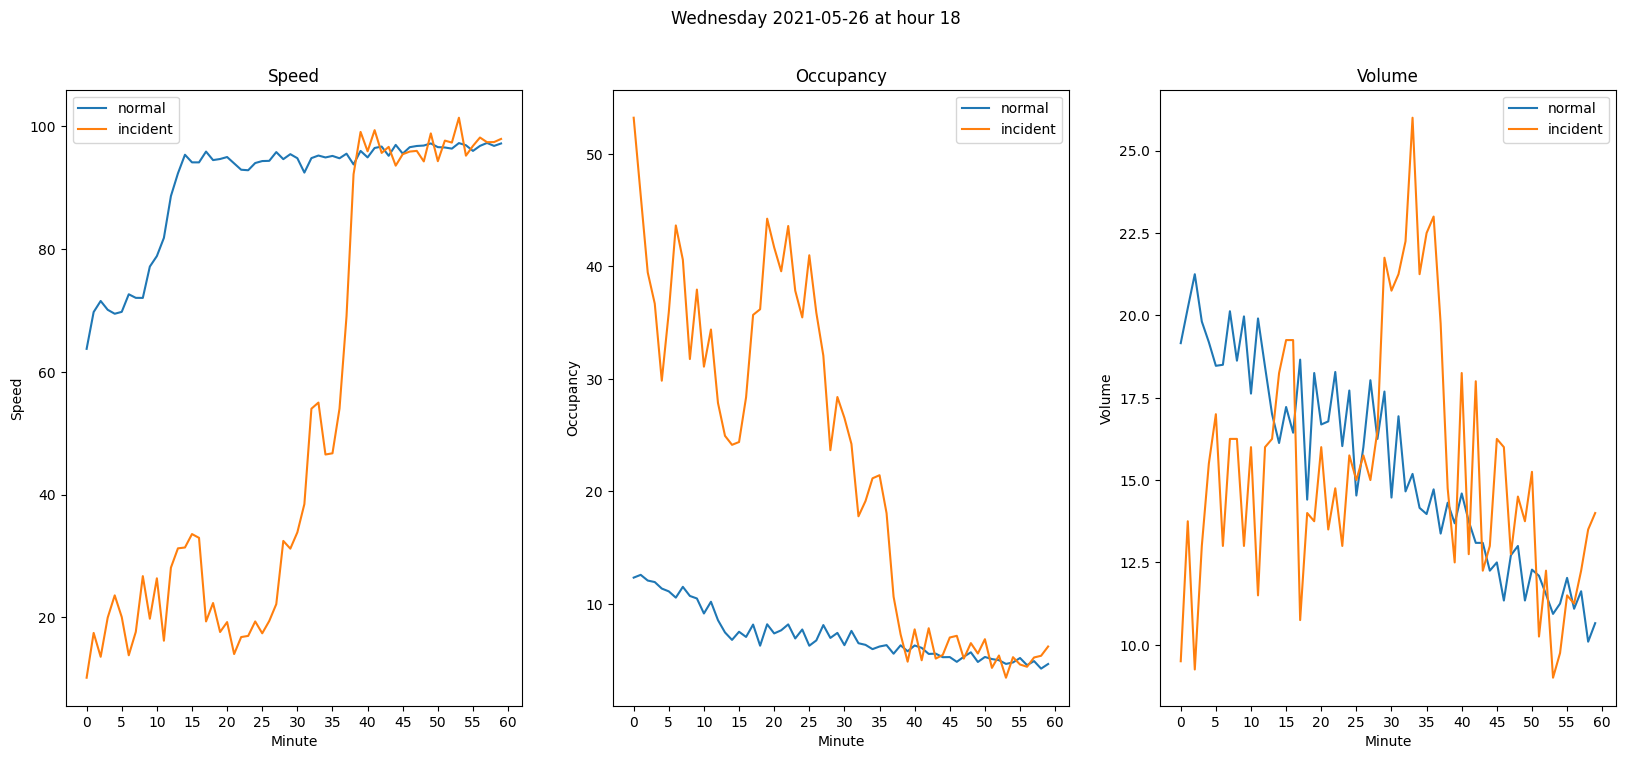

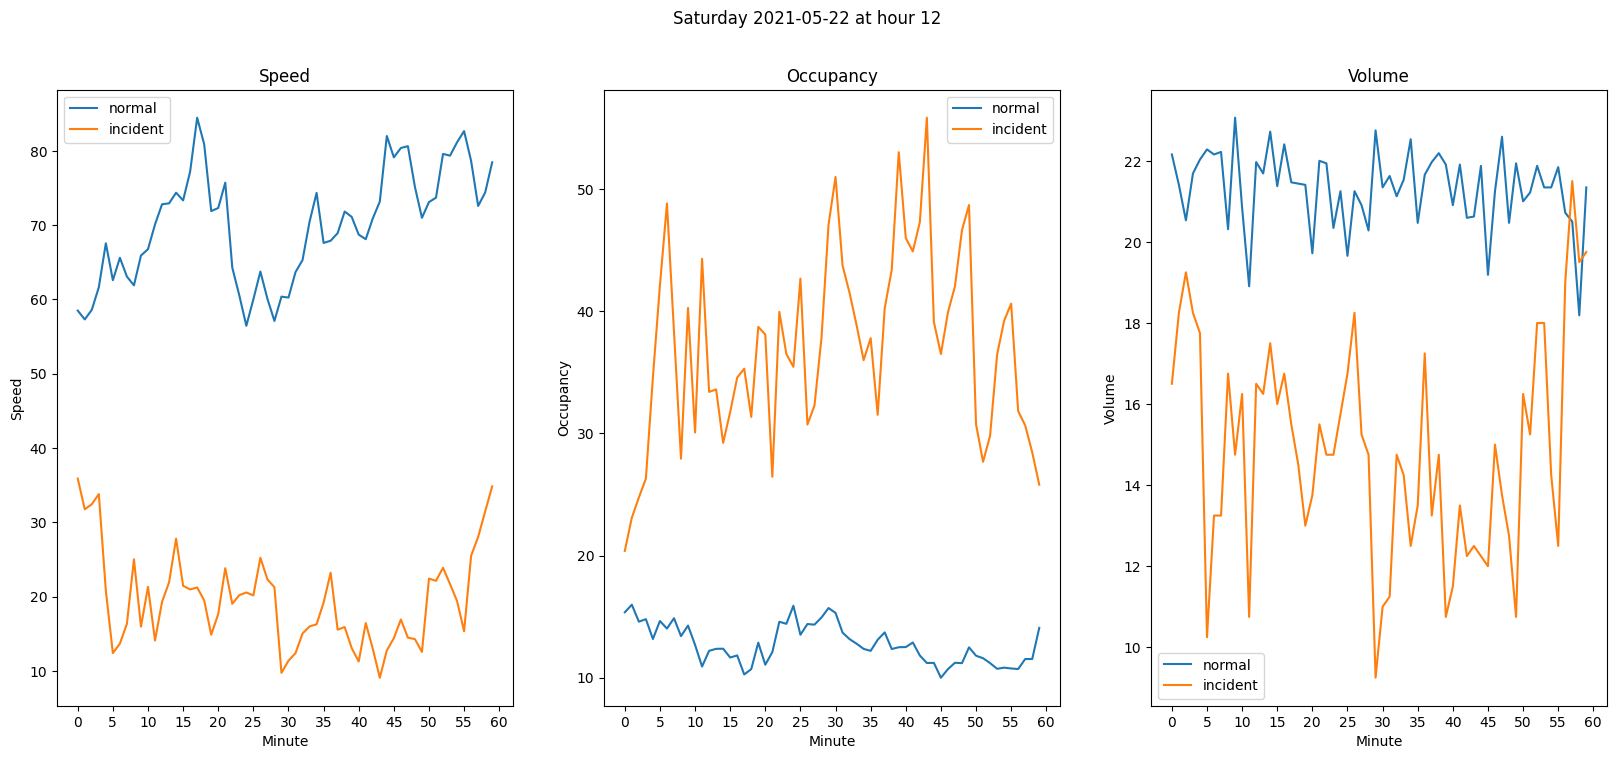

In [22]:
visualize_worst(worst_occupancy)